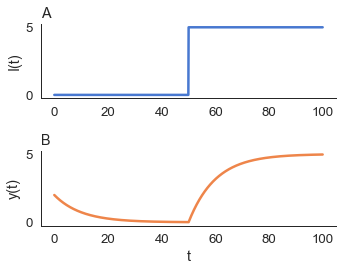

In [1]:
###############################################
## Import packages and specify some settings ##
###############################################
# Import packages
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# This makes plots show up and look nice
%matplotlib inline
sns.set(context='paper',style='white',font_scale=1.5,rc={"lines.linewidth":2.5})
sns.set_palette('muted')

###############################################
###############################################

# Discretized time
T=100 
dt=.1
time=np.arange(0,T,dt)

# Initial condition, y(0)
y0=2

# ODE parameter, tau
tau=10

# Define a step function forcing term
c=5
t1=50
I=np.zeros_like(time)
I[time>=t1]=c

# Define the solution piecewise
y=np.zeros_like(time);
y[time<t1]=y0*np.exp(-time[time<t1]/tau)
y[time>=t1]=c+(y0*np.exp(-t1/tau)-c)*np.exp(-(time[time>=t1]-t1)/tau);

# Make figure
plt.subplots(figsize=(5, 4))

plt.subplot(2,1,1)
plt.plot(time,I)
#plt.xlabel('time (ms)')
plt.ylabel('I(t)')
plt.title('A',loc='left')
sns.despine()


plt.subplot(2,1,2)
plt.plot(time,y,color=sns.color_palette()[1])
plt.xlabel('t')
plt.ylabel('y(t)')
sns.despine()
plt.title('B',loc='left')
plt.tight_layout()




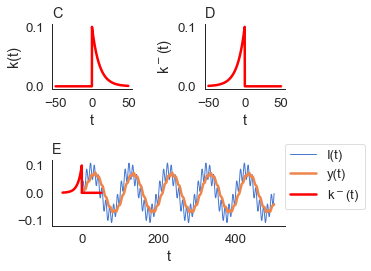

In [2]:


# Discretized time
T=500
dt=.1
time=np.arange(0,T,dt)

# Initial condition, y(0)
y0=0

# ODE parameter, tau
tau=10

# Define a step forcing term
I=.08*np.sin(2*np.pi*time/100)+.03*np.sin(2*np.pi*time/10);


# Define a convolution kernel
s=np.arange(-5*tau,5*tau,dt)
k=(1/tau)*np.exp(-s/tau)*(s>=0)

# Normalizing k to have the correct integral
# (which is 1) gives more accurate results
k=k/(dt*np.sum(k))


# Define the solution as a convolution
y=np.convolve(I,k,'same')*dt


# Make figure
plt.subplots(figsize=(5.5, 4))

plt.subplot(2,2,1)
plt.plot(s,k,color=(1,0,0))
plt.xlabel('t')
plt.ylabel('k(t)')
plt.title('C',loc='left')
sns.despine()

plt.subplot(2,2,2)
plt.plot(s,np.flip(k),color=(1,0,0))
plt.xlabel('t')
plt.ylabel('k$^-$(t)')
plt.title('D',loc='left')
sns.despine()


plt.subplot(2,1,2)
plt.plot(time,I, label='I(t)', linewidth=1)
plt.plot(time,y, label='y(t)')
plt.plot(s,np.flip(k), label='k$^-$(t)',color=(1,0,0))
plt.xlabel('t')
sns.despine()
plt.title('E',loc='left')
plt.legend(loc=(1.0,.25))

plt.tight_layout()

